<a href="https://colab.research.google.com/github/BennettElisa/data-analysis-apps/blob/main/DataAnalysis_AppsDuringCOVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What apps and their features are most popular during COVID19?

<img src="https://1z1euk35x7oy36s8we4dr6lo-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/google-play-ios.jpg">

**Image Source:** https://www.businessofapps.com/news/amazon-app-store-vs-google-play-store-what-are-the-differences/

# Imports

In [ ]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import nltk
# Use seaborn style defaults to set a default figure size across the study.
# sns.set(rc={'figure.figsize':(16,10)})
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction

With the rise of coronavirus, most businesses, schools, and government offices  have temporarily closed down their physical spaces. Schools have gone virtual,  businesses are offering employees the option to work remotely, and many services have pivoted to allow customers to shop and learn via their apps and websites online. Public schools in particular have been hit the hardest by the cornavirus with many to date still meeting virtually. 

In the absence of a physical school environment, many have turned to online applications and websites to supplement or replace their previous learning systems. Online educational resources have been in existence for several years, and since its inception there has been considerable growth in the use of these apps. According to __BusinessInsider__, the global market for kids educational apps in 2017 included 388 million people, and it is predicted that by 2022 it will reach 972 million. 


This project was inspired by the percieved increase in the use of technology and in particular __apps__ during the 2020 Coronavirus pandemic. In March of 2020, much of the world was placed on lockdown in order to help deal with the spread of the virus. All in person activities now needed to be replaced with a virtual solution if possible. Among the most affected industries was education. Schools were faced with the unique problem of having to simulate classroom teaching from the comfort of the students homes, while maintaing a level of instruction to still prepare them for the next grade level.

Educational and video conferencing apps have played a major role in facilitaing this shift from classroom to virtual. Within this study we will look at various apects of trends in Google Play Store and Apple App Store during this unique period in time. We will also take a detailed look at trends within apps that fall into the __education__ category and study app performance in the height of the pandemic.




**Business Impact** 

As of June 2020, Stanford economist, Nicolas Bloom's research lead him to conclude that over 42% of the U.S Labor work force is now working from home. This shift has led businesses to rethink the way employees connect, have meetings, and share work deliverables. 

According to UNESCO, there have been over 1.54 billion youth throughout 190 countries that were not able to attend a physical school as a result of these closures, which amounts to 89% of the world’s student population. While some school systems have reopened, they are mainly private. For example, the New York City School District system, which alone teaches over 1 million children, closed its physical locations this past November as COVID-19 cases rose. With a less than 24-hour notice given to students and teachers, this serves as an example of how physical school systems are in an uncertain state in the midst of this global pandemic. This is an unprecedented situation, and developing online educational programming for over a billion child users has not been previously implemented.

Developers can use this as an opportunity to see what the market is most in need of and what app features are drivers within their perspective stores. 

We predict that overnight school closures due to COVID19 has led to a large uptick in number of educational, communication, business and news apps. In the past, the app gaming industry has been a leader in revenue generated through their app consumption. However we estimate that the educational and communication app sectors are making large gains in revenues generated as a direct result of COVID19 and the shift to online. 

**Sources:**
1. https://news.stanford.edu/2020/06/29/snapshot-new-working-home-economy/
2. https://en.unesco.org/news/covid-19-school-closures-around-world-will-hit-girls-hardest)
3. https://markets.businessinsider.com/news/stocks/consumer-mobile-edugame-market-surges-to-800-2-million-by-2022-1001981022

# Importing Cleaned Datasets




We cleaned the remaining data sets in seperate notebooks and imported the results.

In [ ]:
#remaining cleaned dataframes
appstore_march2020_cleaned_df = pd.read_csv("/content/drive/MyDrive/DS4A Team62/DS4A Team 62/clean_data/March_2020_appleappstore_CLEANED.csv")
playstore_april2020_cleaned_df = pd.read_csv("/content/drive/MyDrive/DS4A Team62/DS4A Team 62/clean_data/April_2020_googleplaystore_CLEANED.csv")
appstore_june2020_cleaned_df = pd.read_csv("/content/drive/MyDrive/DS4A Team62/DS4A Team 62/clean_data/June_2020__appleappstore_CLEANED.csv")
playstore_june2020_cleaned_df = pd.read_csv("/content/drive/MyDrive/DS4A Team62/DS4A Team 62/clean_data/June_2020__googleplaystore_CLEANED.csv")
playstore_july2020_cleaned_df = pd.read_csv("/content/drive/MyDrive/DS4A Team62/DS4A Team 62/clean_data/July_2020__googleplaystore_CLEANED.csv")

We discovered upon attempting to merge the data frames that some of the data types did not maintain thier original values when being exported and imported. In addition, there was a small inconsistency among a single column name which we updated.

In [ ]:
appstore_june2020_cleaned_df['num_ratings'] = appstore_june2020_cleaned_df.num_ratings.astype('float')

In [ ]:
playstore_june2020_cleaned_df['num_ratings'] = playstore_june2020_cleaned_df.num_ratings.astype('float')

In [ ]:
playstore_june2020_cleaned_df = playstore_june2020_cleaned_df.rename(columns={'scrap_date': 'scrape_date'})

In [ ]:
playstore_july2020_cleaned_df = playstore_july2020_cleaned_df.rename(columns={'scrap_date': 'scrape_date'})

#Merging Datasets

At this stage, we are merging all of our datasets and preparing to do a more in depth analysis on over one million data points. Within this merged dataset, it reflects app usage in both Google and Apple app stores from the onset of the coronavirus shutdown in March of 2020, through the end of the academic year in July of 2020.

In [ ]:
data_frames = [appstore_march2020_cleaned_df,playstore_april2020_cleaned_df, appstore_june2020_cleaned_df, playstore_june2020_cleaned_df, playstore_july2020_cleaned_df]
df_merged = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
df_merged.head(10)

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
0,￥０使い放題の出会い！ID交換もし放題の出会い！,17+,0.0,0.0,free,Social Networking,1,apple,2020-03-01,Installs_Not_Included,NaN
1,～美酒と旬菜～ 莉庵（りあん）,17+,0.0,0.0,free,Food & Drink,1,apple,2020-03-01,Installs_Not_Included,NaN
2,～サクサクsesami～司法試験宅建学習のお共に,4+,0.0,0.0,free,Education,2,apple,2020-03-01,Installs_Not_Included,NaN
3,～しろ～,4+,0.0,0.0,free,Food & Drink,1,apple,2020-03-01,Installs_Not_Included,NaN
4,～Sa'mone～居酒屋 みるてん 公式アプリ,4+,0.0,0.0,free,Food & Drink,2,apple,2020-03-01,Installs_Not_Included,NaN
5,＠ほぉ〜むアプリ,9+,0.0,0.0,free,Entertainment,1,apple,2020-03-01,Installs_Not_Included,NaN
6,＠JAM(アットジャム)公式 ＠VOICE(アットボイス),4+,0.0,0.0,free,Entertainment,2,apple,2020-03-01,Installs_Not_Included,NaN
7,＠AR Player / アッと驚くARを探し出そう！,4+,0.0,0.0,free,Entertainment,1,apple,2020-03-01,Installs_Not_Included,NaN
8,＜＜古兰经＞＞老师阿德南,4+,0.0,0.0,free,Business,1,apple,2020-03-01,Installs_Not_Included,NaN
9,＜英検公式＞英検4級・5級スピーキングテスト,4+,0.0,0.0,free,Education,2,apple,2020-03-01,Installs_Not_Included,NaN


We are aware that our dataset includes apps that are not in english. However, we have chosen to keep them in order to see what impact non-english apps have had within the perspective stores.

Below we encountered 113 apps that did not have the appropriate cost type of free or paid. We decided to drop them since they were not discovered during the cleaning process.

In [ ]:
df_merged = df_merged.drop(df_merged[df_merged['cost_type'] == '-1.0'].index)

In [ ]:
df_merged.shape  # total number of apps

(1394761, 11)

# In-Depth Data Analysis

## Analysis of Categories Column


## Unify Category Names 

In [ ]:
# lower case all category names
df_merged.category = df_merged.category.str.lower()

Our category column needs some work in order to reduce it down in size and remove duplicate categories that are impacted by case sentativity or symbols such as the underscore. To reduce the number of categories we'll map out which categories overlap with each other and which categories  we can combined due to similar traits. To start there are 93 different categories in the merged dataframe. By using the lower case method we are able to reduce it down to 73. By mapping out the overlap of various columns and taking into account previous observations we have mapped out a way to reduce our categories to 49 unique types. 

Here is a table to outline of how certain categories will be combined or renamed to match other categories. This table does not include categories with no overlap.

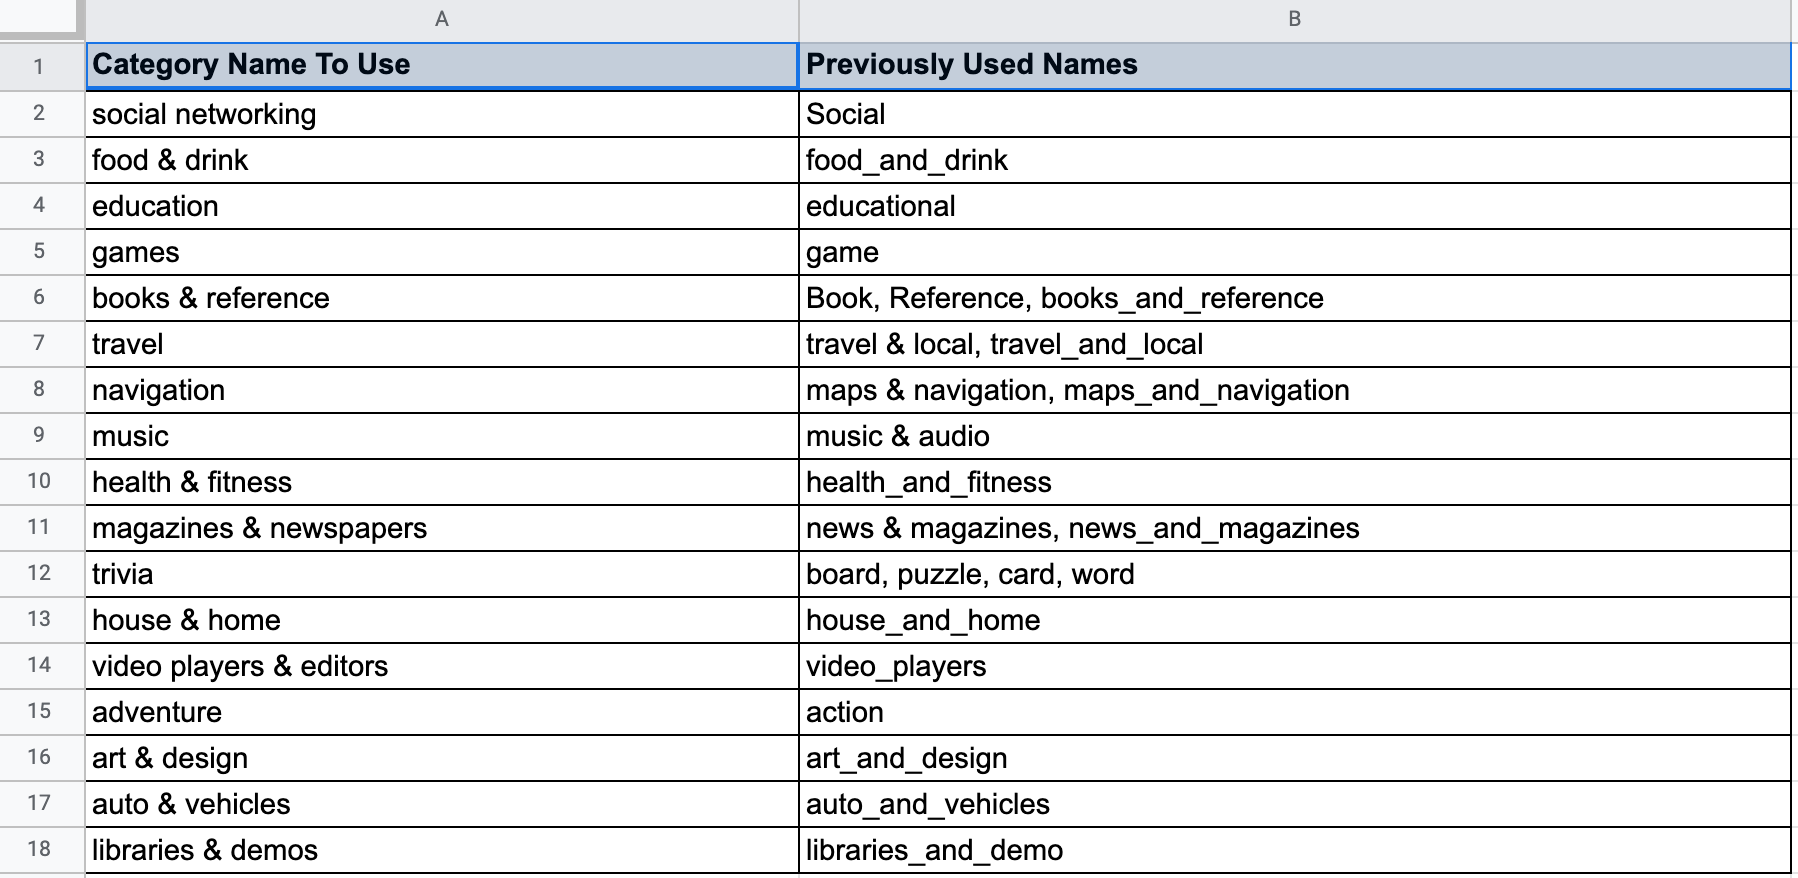

In [ ]:
map_category_name = {
    
'social networking': 'social', 
'food & drink': 'food & drink', 
'education':'education', 
'entertainment':'entertainment',
'business':'business', 
'games':'game', 
'reference':'reference', 
'book':'book', 
'finance':'finance',
'productivity':'productivity',
'lifestyle':'lifestyle', 
'utilities':'utilities', 
'news':'news', 
'photo & video':'photo & video',
'stickers':'stickers', 
'shopping':'shopping', 
'sports':'sports', 
'medical':'medical', 
'weather':'weather', 
'travel':'travel',
'navigation':'maps & navigation', 
'music': 'music & audio', 
'health & fitness': 'health & fitness',
'magazines & newspapers':'magazines & newspapers',
'simulation':'simulation', 
'travel & local':'travel',
'news & magazines':'magazines & newspapers', 
'racing':'racing', 
'trivia':'trivia', 
'arcade':'trivia',
'maps & navigation':'maps & navigation', 
'house & home':'house & home', 
'casual':'casual',
'video players & editors':'video players & editors', 
'strategy':'strategy', 
'art & design':'art & design',
'puzzle':'trivia',
'adventure':'action & adventure', 
'social': 'social',
'personalization':'personalization',
'photography':'photography',
'communication':'communication', 
'role playing':'role playing',
'action':'action & adventure', 
'board':'trivia', 
'tools':'tools',
'music & audio':'music & audio',
'books & reference':'books & reference',
'card':'trivia', 
'comics':'comics',
'libraries & demo':'libraries & demo', 
'casino':'casino', 
'parenting':'parenting',
'events':'events', 
'dating':'dating',
'beauty':'beauty', 
'word':'trivia', 
'auto & vehicles':'auto & vehicles',
'educational':'education',
'catalogs':'catalogs',
'art_and_design':'art & design',
'auto_and_vehicles':'auto & vehicles',
'books_and_reference':'books & reference',
'food_and_drink':'food & drink', 
'health_and_fitness':'health & fitness',
'house_and_home':'house & home',
'libraries_and_demo':'libraries & demo', 
'game':'game',
'family':'family', 
'travel_and_local':'travel',
'video_players':'video players & editors',
'news_and_magazines': 'news', 
'maps_and_navigation':'maps & navigation',
}

# replace category names 

df_merged['category'] = df_merged['category'].map(map_category_name)

In [ ]:
# Over 121,714 in the March Apple Store dataset have their primary genre as education. 
# In Merged Dataset there are 201,727 that fall under "Education" and 6,160 that fall under Educational 
# Currently there is a total of 207,887 apps that fall under Education
# After unifiying category names - there are 207,994 (need to account for the additional 107 - Perhaps when Windred reset some of the datasets?)

df_merged[df_merged['category'] == 'education'].shape

(207990, 11)

Next, well plot a visualization of the distribution of the number of apps within each category. At this point we know that __games__ and __education__ have been top categories prior to merging all of our datasets so we'll see what trends emerge with all our datasets now combined with over 1M data points. 

In [ ]:
df_merged["category"].value_counts()

education                  207990
game                       187919
business                   163844
entertainment               98291
food & drink                64796
music & audio               61860
finance                     59986
lifestyle                   50536
books & reference           50255
tools                       42957
productivity                35391
trivia                      32995
personalization             29087
travel                      27869
health & fitness            25391
sports                      21758
shopping                    20982
magazines & newspapers      16356
social                      15641
medical                     14098
book                        13463
utilities                   13341
photography                 13191
communication               12859
maps & navigation           10186
action & adventure          10121
casual                       9107
photo & video                8558
reference                    8222
stickers      

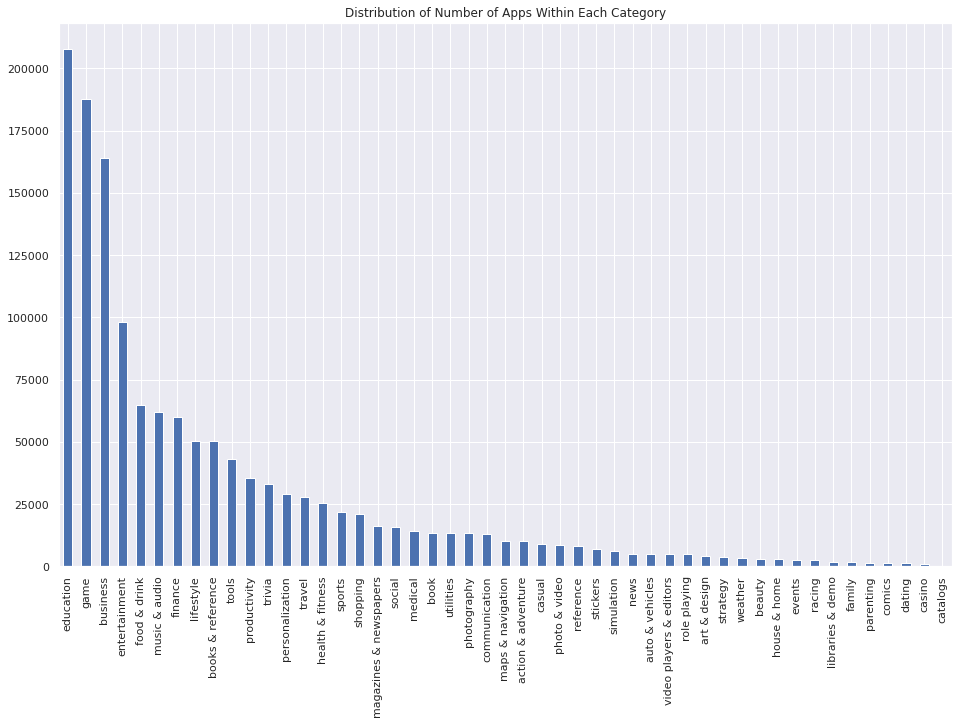

In [ ]:
plt.figure(figsize=(16,10))
df_merged["category"].value_counts().plot.bar()
_ = plt.title('Distribution of Number of Apps Within Each Category')

##Analyze popularity of age ratings among developers

---

***What age ratings are most utilized by developers?*** 

In order to answer this question and get a better sense of how developers optimize their app downloads we'll explore the __age_rating__ column. In our data cleaning we unified the way age ratings are classified among datasets. Below is a chat to highligh previous naming conventions and what now exisit within our data analysis. 

We choose to unify __17+, 18+, Adults only__ and __Mature 18+__ into the unified classification of __17+__. This decision was driven primiary due to our previous exloritory work on the dataset which reveled very few apps that feel into the 17+ and older classifications.


Here is a visual table of how the the new naming conventions are applied across all datasets for the column __age_rating__.

NOTE : Unrated apps

Not all apps in the Google Play store have a rating. Unrated apps are treated like high-maturity apps for the purpose of parental controls until they get a rating. If you set up parental controls to restrict apps and games to a certain rating, you won't see any Unrated apps in the Play Store app. For this reason we have chosen to drop unrated apps from our dataset.

Source(Apps & Games content ratings on Google Play - Google Support)

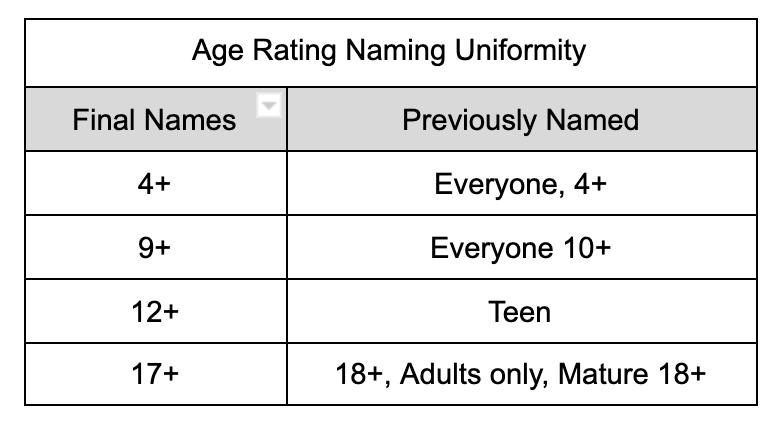

Now let's look at the __age_rating__ column in order to see which age_ratings are used the most with developers. We'll start by grouping our data based on the unique categories within the __age_rating__ column and then counting up the the number of times each of these unique categories appears. 

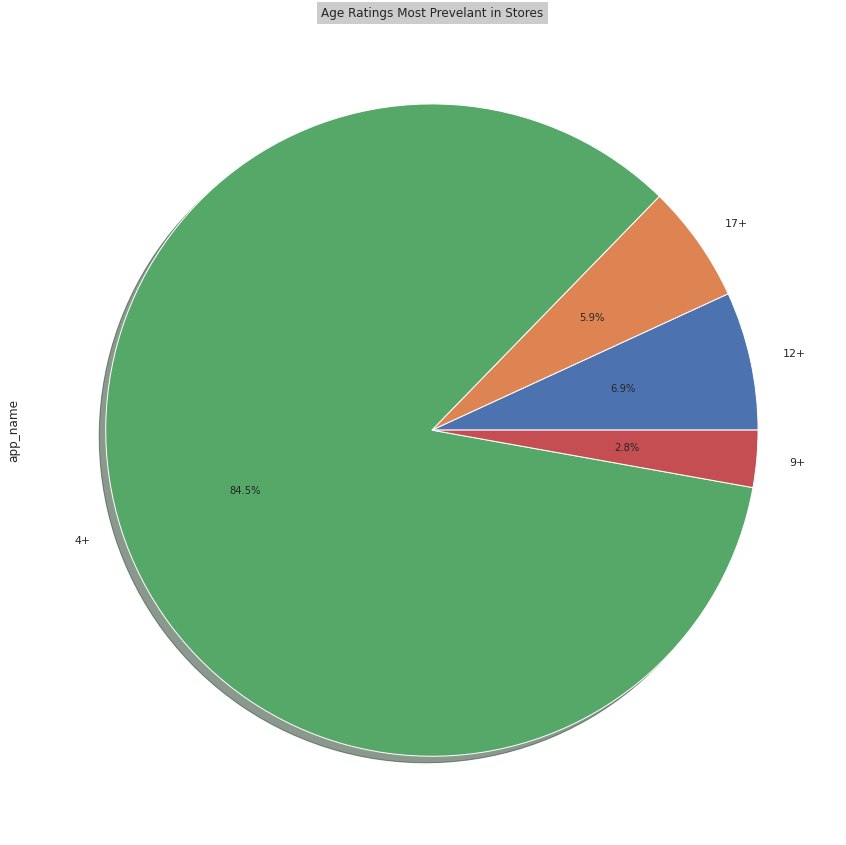

In [ ]:
plt.figure(figsize=(24,15))
df_merged.groupby(['age_rating'])['app_name'].count().plot.pie(autopct='%1.1f%%', shadow=True)
#texts[0].set_fontsize(4)
_ = plt.title('Age Ratings Most Prevelant in Stores', bbox={'facecolor':'0.8', 'pad':5})


## Obervations:



---



In our merged data set of over 1M apps the age rating that is most used is __4+__. This isn't very surprising given most developers what to capture a larger audiance verses a nitch audiance. Apps with the label __4+__ were also labeled __Everyone__ depending on the store. With over 1M apps in our dataset __84.4 %__ are classified as being appropiate for ages 4+. The remainding __15.6 %__ is split between the other three age rating categories of __9+, 12+, 17+__. 

This leads us to believe that developers are **more pron** to use the **4+ age rating** for their apps as a way to reach the larger population unless there is content that is truly not suited for young kids. 

As a side note, this leads us to believe that these ratings have less to do with a 4 or 5 year old being able to functionally use the app and more to do with the content within in the app. In order to explore this thought further we looked into how Google Play Store and Apple App Store determine the age rating for apps submitted by developers. 

This is what we discovered:


Google Play states on it's website that indeed app ratings do not determine whether or not the apps are designed for users of a specific age. Rather "content ratings" are used to describe the __minimum__ maturity level of content contained within the app. It also highlights that age-based ratings are guided by a varitey of factors and users can view the individual apps "details page" to see why the app got its rating. 

Although there are a number of factors involved in rating apps for the designated age group the top factors listed by Google Play include:

1.   Sexual Content
2.   Violence
3.   Drugs
4.   Gambling
5.   Profane Language

Apple App store has developers fill out a ranking matrix with 10 questions that then determines the age rating label assigned to the app. Based on __Tech Crunch__ these questions must be answered with one of the three options:


1.   None
2.   Infrequent/Mild
3.   Frequent/Intense

These classifications are based on questions around the apps sexual content, cartoon or fantancy violence, drugs, alcohol, tabacoo, gambling, profane language, horror/fear themes etc. At the end of the 10 question matrix and depending on how the developer has classified it's app with these three options it will then be *given a age rating* by Apple App Stores. 

With less than __10 %__ of apps within our combined datasets classified as __17+__ it seems to indicate that the majority of developers are keen on making sure their apps do not contain sexual content, violence, drugs, grambling and profance language. The __majority__ of developers select __None__. It is important to note, that although the major of apps are given the 4+ age rating there is controveriy around this topic. This is due to the fact that many apps contain in-app ad's and the content of the ad's can not be monitored by the developers. The content shown on different ad's may show/contain content that falls within some of the classifications listed above.

__Sources:__ 
1. https://support.google.com/googleplay/answer/6209544?hl=en#zippy=%2Cage-based-rating-description
2. https://techcrunch.com/2009/06/29/heres-how-iphone-app-store-ratings-work-hint-they-dont/

##  Age rating conclusions

---

In conclusion, we would recommend that developers continue to build apps that will be apprpiate for __everyone__ which would fall under the age rating of __4+__. This puts the developers in the position to have their app viewed by a much larger segment of the population, potentially leading to more downloads. 

In another part of our study we will look at any possible correlations between age ratings and number of times the app was installed. 

##Describe the relationship between age and app downloads

Now that we have explored the relationship of age ratings among developers, we will look at how age ratings play a role in how likely an app is to be downloaded.

In [ ]:
age_downloads_df = df_merged[~(df_merged.num_installs == 'Installs_Not_Included')	]
age_downloads_grouped_df = age_downloads_df.groupby(["age_rating","num_installs"]).sum().sort_values(by=["age_rating","num_installs"], ascending=[False,False])
age_downloads_grouped_df = age_downloads_grouped_df.reset_index()


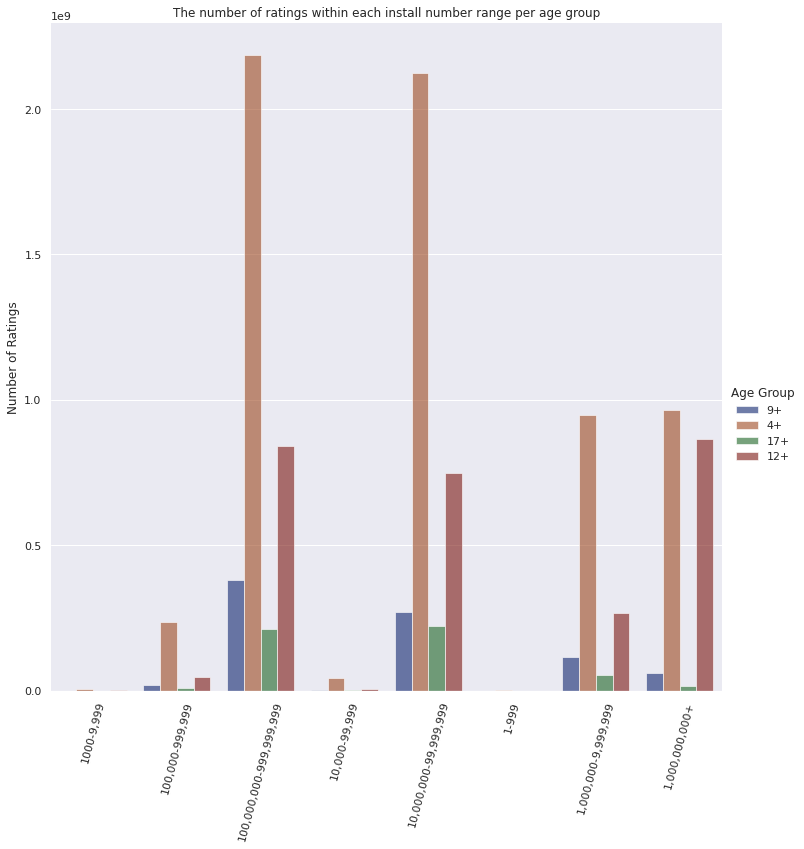

In [ ]:
g = sns.catplot(
    data=age_downloads_grouped_df, kind="bar",
    x="num_installs", y="num_ratings", hue="age_rating",
     ci="sd",palette="dark",alpha=.6, height=10
)
plt.xticks(rotation=75)
g.despine(left=True)
g.set_axis_labels("", "Number of Ratings")
g.legend.set_title("Age Group")
_ = plt.title("The number of ratings within each install number range per age group")

The most downloaded apps come from the 4+ age group. This makes sense as these apps are inteded for all ages meaning the have the largest audience. The 12+ age group comes in second.

## Top 10 categories based on highest number of ratings and average rating


**What are the top 25 apps across all categories based on the highest number of ratings and highest number of averge ratings?**


Now, we'll explore the categories column a bit more and see what correlations we can find between the top categories and the number of app ratings as well as the average ratings.

We'll start by grouping by the category column and then finding the sum value of the average ratings column and the number of ratings column. We will use these values to sort from highest to lowest and then capture the top 25 from the results. 


Let's move into exploring apps of top interest across all categories based on number of rating and average ratings from the onset of COVID19 in March of 2020. We realize these apps may have also been popular based on the number of rating and average rating filters prior to COVID19. However, rather than do a comparision of previously popular apps we simply seek to see at the onset of COVID19 and onwards which apps standout amoung categories for having the top number of ratings and the top average rating

In [ ]:
top10_cat_avg_num_ratings = df_merged.groupby(['category'])[['avg_rating', 'num_ratings']].sum().sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False]).head(10)
top10_cat_avg_num_ratings = top10_cat_avg_num_ratings.reset_index()
top10_cat_avg_num_ratings

,category,avg_rating,num_ratings
0,education,347034.2,148006857.0
1,game,284868.2,859099340.5
2,entertainment,181931.2,284492537.5
3,books & reference,162057.7,97292154.0
4,music & audio,159480.0,309183824.5
5,tools,131373.9,768743323.0
6,lifestyle,121622.2,118856140.0
7,trivia,118129.7,940109287.0
8,business,114530.7,81953330.0
9,finance,110497.7,221769228.0


In [ ]:
findTop10NumRatings = df_merged.groupby(['category'])['num_ratings'].sum().nlargest(10)
findTop10NumRatings

category
communication              1.065145e+09
trivia                     9.401093e+08
social                     8.992206e+08
action & adventure         8.886103e+08
game                       8.590993e+08
tools                      7.687433e+08
casual                     5.134867e+08
photography                4.201536e+08
video players & editors    3.914782e+08
sports                     3.646003e+08
Name: num_ratings, dtype: float64

In [ ]:
communctionApps = df_merged[df_merged['category'] == 'communication']

In [ ]:
communctionApps.sort_values(by='num_ratings', ascending=[False])

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
890812,WhatsApp Messenger,4+,4.3,117019303.0,free,communication,1,google,2020-07-01,"1,000,000,000+",2020-07-20
730661,WhatsApp Messenger,4+,4.3,109817549.0,free,communication,1,google,2020-04-01,"1,000,000,000+",NaN
1100299,Messenger – Text and Video Chat for Free,4+,4.2,73577183.0,free,communication,1,google,2020-07-01,"1,000,000,000+",2020-07-21
749995,Messenger – Text and Video Chat for Free,4+,4.2,71945669.0,free,communication,1,google,2020-04-01,"1,000,000,000+",NaN
784163,WhatsApp Messenger,4+,4.4,69119316.0,free,communication,1,google,2020-06-01,"1,000,000,000+",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1363597,Ankit Construction Site Admin,12+,0.0,NaN,free,communication,1,google,2020-07-01,1-999,2020-03-18
1366216,Ampabook,4+,0.0,NaN,free,communication,1,google,2020-07-01,1-999,2020-02-07
1368355,Alpha Smart Office for Mobile,4+,0.0,NaN,free,communication,1,google,2020-07-01,1-999,2020-02-04
1383782,ABC Prueba,4+,0.0,NaN,free,communication,1,google,2020-07-01,1-999,2020-05-29


In [ ]:
df_merged[df_merged['app_name'] == 'Zoom']

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
22693,Zoom,4+,0.0,0.0,free,business,3,apple,2020-03-01,Installs_Not_Included,NaN
728964,Zoom,4+,3.6,1138.0,free,personalization,1,google,2020-04-01,"100,000-999,999",NaN
877339,Zoom,4+,3.8,1542.0,free,personalization,1,google,2020-07-01,"100,000-999,999",2012-10-08


In [ ]:
top10_cat_series = top10_cat_avg_num_ratings[['category']]
top10_cat_series

,category
0,education
1,game
2,entertainment
3,books & reference
4,music & audio
5,tools
6,lifestyle
7,trivia
8,business
9,finance


In [ ]:
df_merged['category'].value_counts()

education                  207990
game                       187919
business                   163844
entertainment               98291
food & drink                64796
music & audio               61860
finance                     59986
lifestyle                   50536
books & reference           50255
tools                       42957
productivity                35391
trivia                      32995
personalization             29087
travel                      27869
health & fitness            25391
sports                      21758
shopping                    20982
magazines & newspapers      16356
social                      15641
medical                     14098
book                        13463
utilities                   13341
photography                 13191
communication               12859
maps & navigation           10186
action & adventure          10121
casual                       9107
photo & video                8558
reference                    8222
stickers      

## Top 10 apps in general within different categories

In [ ]:
top_apps_within_categories = df_merged.groupby(['app_name', 'category'])[['avg_rating', 'num_ratings']].sum().sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False])

# Reset Index 
top_apps_within_categories.head(10)

,,avg_rating,num_ratings
app_name,category,,
Amazon Prime Video,entertainment,22.0,5414983.0
Indeed Job Search,business,21.8,3925140.0
Premier League - Official App,sports,21.7,469630.0
WWE,entertainment,21.6,2310455.0
Talking Ginger 2,entertainment,21.5,2240162.0
Allrecipes Dinner Spinner,food & drink,20.8,323903.5
Netflix,entertainment,20.3,24169192.0
Google Classroom,education,20.0,507410.0
Domino's Pizza USA,food & drink,19.4,7043682.0


In [ ]:
reDO = df_merged.groupby(['app_name'])['num_ratings'].sum().nlargest(10)

# Reset Index 
reDO

app_name
WhatsApp Messenger                          296243757.0
Facebook                                    280617976.0
Instagram                                   269789889.0
Messenger – Text and Video Chat for Free    202169430.0
YouTube                                     172488199.0
Clash of Clans                              103341457.0
Subway Surfers                               95270544.0
Candy Crush Saga                             82968944.0
Google Photos                                62800561.0
Snapchat                                     62153028.0
Name: num_ratings, dtype: float64

In [ ]:
df_merged[df_merged['app_name'] == 'Google Classroom']

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
447201,Google Classroom,4+,4.5,147594.0,free,education,67,apple,2020-03-01,Installs_Not_Included,NaN
758849,Google Classroom,4+,3.9,128926.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
781421,Google Classroom,4+,4.0,5942.0,free,education,33,apple,2020-06-01,Installs_Not_Included,NaN
787836,Google Classroom,4+,4.2,69498.0,free,education,1,google,2020-06-01,"10,000,000-99,999,999",NaN
1203345,Google Classroom,4+,3.4,155450.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-06-10


## Top 10 overall apps based on average rating and total ratings


In [ ]:
# Find top 10 apps within dataset across Top 25 categories based on top avg_rating and top num_ratings (columns shared between all datasets)
top10_avgRating_numRating_APPS = df_merged.groupby(['app_name'])[['avg_rating', 'num_ratings']].sum().sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False]).head(10)
# Reset Index 
top10_avgRating_numRating_APPS = top10_avgRating_numRating_APPS.reset_index()
top10_avgRating_numRating_APPS

,app_name,avg_rating,num_ratings
0,PewDiePie's Tuber Simulator,24.3,5739068.0
1,Cytus,23.7,1148296.0
2,Bible,23.4,8483415.0
3,Bloons TD 5,23.3,633120.0
4,Fernanfloo,23.1,1689391.5
5,Toca Life: City,22.9,106523.0
6,Narcos: Cartel Wars,22.8,896706.0
7,Five Nights at Freddy's 3,22.8,109516.0
8,Shadow Fight 2,22.8,37252178.0
9,Fallout Shelter,22.8,9906214.0


## Top 10 apps in education by number of ratings

We will start with the top 10 apps within the education category based on total number of ratigs to get an overall look into what's trending in education.

In [ ]:
edu_apps_df = df_merged[df_merged['category'] == 'education']
edu_apps_df.sort_values(by='num_ratings', ascending=[False]).head(10)

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
1258969,Duolingo: Learn Languages Free,4+,4.7,9577968.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-21
764028,Duolingo: Learn Languages Free,4+,4.7,9030782.0,free,education,1,google,2020-04-01,"100,000,000-999,999,999",NaN
1044837,Photomath,4+,4.6,1661073.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-08
926302,Toca Kitchen 2,4+,4.1,1364449.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2017-06-29
1348725,BYJU'S – The Learning App,4+,4.5,1356974.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-06-18
1132784,"Learn Languages with Memrise - Spanish, French",4+,4.6,1332577.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-07-17
753068,"Learn Languages with Memrise - Spanish, French",4+,4.6,1305206.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
772666,BYJU'S – The Learning App,4+,4.6,1261544.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
584368,ClassDojo,4+,5.0,1165030.0,free,education,26,apple,2020-03-01,Installs_Not_Included,NaN
606070,Canvas Student,4+,4.5,1125147.0,free,education,19,apple,2020-03-01,Installs_Not_Included,NaN


In [ ]:
edu_apps_df_part2 = df_merged[df_merged['category'] == 'education']
edu_apps_df_part2.sort_values(by=['num_ratings','avg_rating'], ascending=[False, False]).head(10)

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
1258969,Duolingo: Learn Languages Free,4+,4.7,9577968.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-21
764028,Duolingo: Learn Languages Free,4+,4.7,9030782.0,free,education,1,google,2020-04-01,"100,000,000-999,999,999",NaN
1044837,Photomath,4+,4.6,1661073.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-08
926302,Toca Kitchen 2,4+,4.1,1364449.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2017-06-29
1348725,BYJU'S – The Learning App,4+,4.5,1356974.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-06-18
1132784,"Learn Languages with Memrise - Spanish, French",4+,4.6,1332577.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-07-17
753068,"Learn Languages with Memrise - Spanish, French",4+,4.6,1305206.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
772666,BYJU'S – The Learning App,4+,4.6,1261544.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
584368,ClassDojo,4+,5.0,1165030.0,free,education,26,apple,2020-03-01,Installs_Not_Included,NaN
606070,Canvas Student,4+,4.5,1125147.0,free,education,19,apple,2020-03-01,Installs_Not_Included,NaN


Now, let's look at the top 10 apps overall in both Google Play Store and Apple App Store. We'll focus on the educational category and base it on the number of ratings. 

In [ ]:
edu_apps_df[edu_apps_df['store'] == 'google'].sort_values(by='num_ratings', ascending=[False]).head(11)

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
1258969,Duolingo: Learn Languages Free,4+,4.7,9577968.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-21
764028,Duolingo: Learn Languages Free,4+,4.7,9030782.0,free,education,1,google,2020-04-01,"100,000,000-999,999,999",NaN
1044837,Photomath,4+,4.6,1661073.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2020-07-08
926302,Toca Kitchen 2,4+,4.1,1364449.0,free,education,1,google,2020-07-01,"100,000,000-999,999,999",2017-06-29
1348725,BYJU'S – The Learning App,4+,4.5,1356974.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-06-18
1132784,"Learn Languages with Memrise - Spanish, French",4+,4.6,1332577.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-07-17
753068,"Learn Languages with Memrise - Spanish, French",4+,4.6,1305206.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
772666,BYJU'S – The Learning App,4+,4.6,1261544.0,free,education,1,google,2020-04-01,"10,000,000-99,999,999",NaN
787084,"Learn languages, grammar & vocabulary with Mem...",4+,4.7,1107948.0,free,education,1,google,2020-06-01,"10,000,000-99,999,999",NaN
1188365,Hello English: Learn English,4+,4.6,882748.0,free,education,1,google,2020-07-01,"10,000,000-99,999,999",2020-07-17


In [ ]:
edu_apps_df[edu_apps_df['store'] == 'apple'].sort_values(by='num_ratings', ascending=[False]).head(10)

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
584368,ClassDojo,4+,5.0,1165030.0,free,education,26,apple,2020-03-01,Installs_Not_Included,NaN
606070,Canvas Student,4+,4.5,1125147.0,free,education,19,apple,2020-03-01,Installs_Not_Included,NaN
191461,Remind: School Communication,4+,5.0,410374.0,free,education,6,apple,2020-03-01,Installs_Not_Included,NaN
208140,Quizlet,4+,5.0,325662.0,free,education,16,apple,2020-03-01,Installs_Not_Included,NaN
238296,Photomath,4+,5.0,235953.0,free,education,32,apple,2020-03-01,Installs_Not_Included,NaN
638828,Blackboard,4+,4.5,231682.0,free,education,30,apple,2020-03-01,Installs_Not_Included,NaN
514842,Elevate - Brain Training,4+,5.0,216334.0,free,education,2,apple,2020-03-01,Installs_Not_Included,NaN
710254,ABCmouse.com,4+,4.5,196559.0,free,education,1,apple,2020-03-01,Installs_Not_Included,NaN
508436,Epic! - Kids’ Books and Videos,4+,4.5,176107.0,free,education,7,apple,2020-03-01,Installs_Not_Included,NaN
340042,Lumosity: Brain Training,4+,4.5,172211.0,free,education,7,apple,2020-03-01,Installs_Not_Included,NaN


## Top 5 categories with the lowest number of reviews

The game category has the most apps with a low number of ratings. Our thoughts surrounding this is that people who download gaming apps are looking more so to use them than leave reviews. This high number can also be attributed to the fact that more gaming apps exist that others.

In [ ]:
low_ratings_df = df_merged[(df_merged.num_ratings < 10)& ~(df_merged.num_ratings == 0)]
low_ratings_grouped_df = low_ratings_df.groupby(["category"]).count().sort_values(by="app_name", ascending=False)
low_ratings_grouped_df.head()

,app_name,age_rating,avg_rating,num_ratings,cost_type,lang_supported,store,scrape_date,num_installs,last_updated
category,,,,,,,,,,
game,23582,23582,23582,23582,23582,23582,23582,23582,23582,0
education,16354,16354,16354,16354,16354,16354,16354,16354,16354,7843
entertainment,9589,9589,9589,9589,9589,9589,9589,9589,9589,3665
business,7456,7456,7456,7456,7456,7456,7456,7456,7456,2800
music & audio,6497,6497,6497,6497,6497,6497,6497,6497,6497,4110


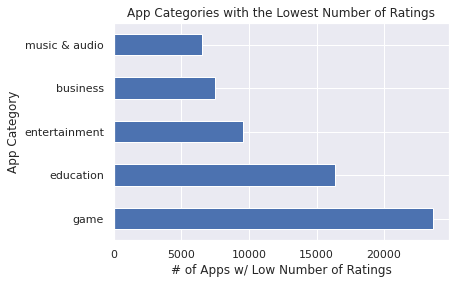

In [ ]:
ax = (low_ratings_grouped_df.head(5).reset_index().plot.barh(x="category", y="app_name",legend=False))
ax.set_xlabel("# of Apps w/ Low Number of Ratings")
ax.set_ylabel("App Category")
_ = ax.set_title("App Categories with the Lowest Number of Ratings")

## Top 5 categories with the highest number of apps with no reviews

It seems that business apps are the most unrated. People tend to use business apps out of neccessity for work or personal organization. They may not consider the app performance as long as it is able to accomplish the buisness task. Education comes in second, presumably for similar reasons. Games come in a close third, the explanation here is the same as our previous question. People who download gaming apps are looking more so to use them than leave reviews.

In [ ]:
unrated_df = df_merged[df_merged.num_ratings == 0]
unrated_grouped_df = unrated_df.groupby(["category"]).count().sort_values(by="app_name", ascending=False)
unrated_grouped_df.head()

,app_name,age_rating,avg_rating,num_ratings,cost_type,lang_supported,store,scrape_date,num_installs,last_updated
category,,,,,,,,,,
business,134207,134207,134207,134207,134207,134207,134207,134207,134207,12045
education,123093,123093,123093,123093,123092,123093,123093,123093,123093,23955
game,113639,113639,113639,113639,113639,113639,113639,113639,113639,0
food & drink,53176,53176,53176,53176,53176,53176,53176,53176,53176,5980
entertainment,51457,51457,51457,51457,51457,51457,51457,51457,51457,10331


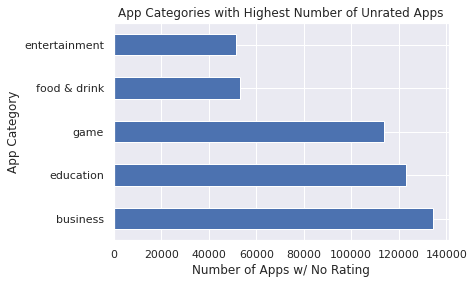

In [ ]:
ax = (unrated_grouped_df.head(5).reset_index().plot.barh(x="category", y="app_name",legend=False))
ax.set_xlabel("Number of Apps w/ No Rating")
ax.set_ylabel("App Category")
_ = ax.set_title("App Categories with Highest Number of Unrated Apps")

## Worst 10 categories based on lowest number of ratings and average rating


In [ ]:
df_merged.groupby(['category'])[['avg_rating', 'num_ratings']].sum().sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False]).tail(10)
 

,avg_rating,num_ratings
category,,
beauty,6433.2,4452307.0
news,5722.8,25794666.0
libraries & demo,5026.6,5731871.0
parenting,4810.7,6076791.0
comics,4185.4,10375819.0
casino,4127.5,54790620.0
events,4064.9,724476.0
dating,3785.4,15368694.0
stickers,1920.0,16017.5


In [ ]:
# mid-point dataFrame copy
df_merged_mid_point = df_merged.copy()

## Natural Language Processing

From here we will move into using the Natural Language Toolkit to discover what keywords are most frequently used in naming conventions of apps. From this we'll focus on the top 20 words most frequently used to name an app. First we will plot it as a **bar graph** and then a **world cloud**. 



In [ ]:
#Import Counter, Natural Language Toolkit 
from collections import Counter
import nltk
# Download stopwords 
nltk.download('stopwords')
# regEx Expressions
import re

# Libraries for Word Cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


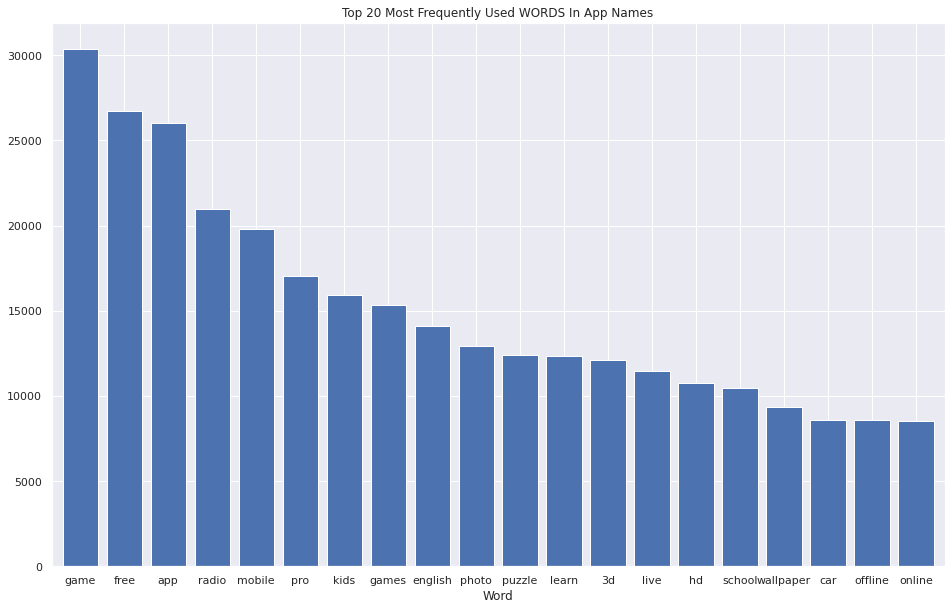

In [ ]:
# top 20 words
top_N = 20

# define stopwords varaible 
stopwords = nltk.corpus.stopwords.words('english')

# replace '|' and drop all stopwords
words = (df_merged.app_name
         .str.lower()
         .str.cat(sep=' ')
         .split())

more_to_ignore = ['&', 'de', ':', '-','2020', '2019', '2','–','Hidden', 'Object']
stopwords.extend(more_to_ignore) 

real_words = [word for word in words if word not in stopwords]
results = pd.DataFrame(Counter(real_words).most_common(top_N),
                       columns=['Word', 'Frequency']).set_index('Word')
# plot bar graphb
results.plot.bar(rot=0, figsize=(16,10), width=0.8, legend=False)
_ = plt.title('Top 20 Most Frequently Used WORDS In App Names') # the underscore removes the labeling prior to printing visual 

In [ ]:
results.head()

,Frequency
Word,
game,30388
free,26701
app,26005
radio,20966
mobile,19779


The top 20 words used in the naming conventions of apps tell us a great deal about how developers target their audiance. The word __game__ appears over __30,000__ times within app name titles followed by the word __free__ over __25,000__ times. Using the word __free__ as part of the app name the consumer knows immediantly that the app is free. This seems to be a go to stragety for developers targeting people who prefer free apps.  

Following these two categories is __app__ and __radio__. __Radio__ was most suprising and upon further investigation and according to the Android Authority, Pandora App made streaming random music mainstream.

According to Statista music streaming is big business and at times is credited for saving the music industry. In 2019, the music streaming industry made 8.8 billion.  

 **Sources:**

>  1.https://www.androidauthority.com/best-radio-apps-for-android-393884/
  2.https://www.statista.com/statistics/798125/  most-popular-us-music-streaming-services-ranked-by-audience/



 



Let's dig in a bit deeper and see what words in app_names under the category of __education__ are most frequently used with the help of a world cloud.



In [ ]:
#text = " ".join(word for word in edu_apps_df.app_name)
text = " ".join(word for word in df_merged.app_name)
print('There are {} words in the app_names column'.format(len(text)))

There are 31621684 words in the app_names column


In [ ]:
#edu_stopwords.update()

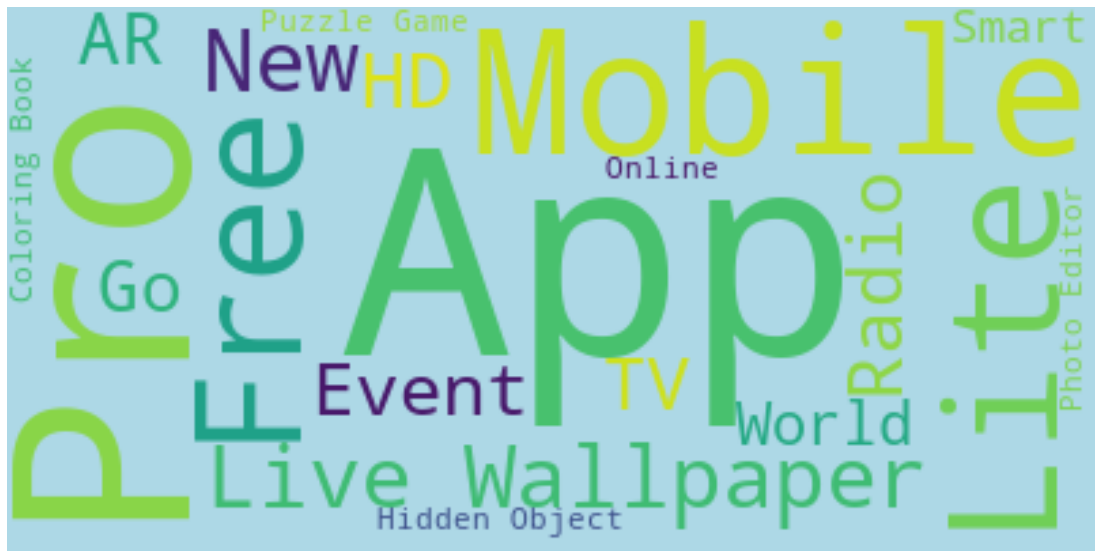

In [ ]:
edu_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=edu_stopwords, max_words=20, background_color='lightblue').generate(text)

#display
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For this world cloud we included the top 100 words that are used with apps that fall under the education category. Visually there are some very distinct words that stand out. The top 10 that captured our teams interest included:

1. App
2. School
3. Pro
4. Lite
5. Public School
6. Math
7. Quiz
8. Exam Prep
9. Learn English
10. Mobile


There are a variety of infreances we made from this data. Target marketing seems very intentional with education apps with app names that immediantly convey that it's target audiances are schools as these worlds were the largest. It was also interesting to note, the word __Public School__ is very prominent in the naming convention of apps. Therefore signaling immediantly that it's for students and public schools to use. App's within this category use key words such as __free, mobile, pro, lite, math, and app__ to make give the user an immediate understanding of what the app is offering.  


In our next selection we'll look at what key words are most frequently used based on other parameters such as highest rated apps, most downloaded apps
 etc. 

### Most frequent key words of the highest rated, installed, and reviewed apps

The two most consistent key words associated with higher ratings, downloads, and reviews are 'game' and 'free'. The presence of the key word 'free' alongside the observation that most apps downloaded are free, suggests the intuitive statement that people prefer apps that are free. The sonsistent presence of 'game' may additionally suggest that most of the apps installed, rated, and favorably preffered are games that are free of use.

         Frequency
Word              
game         30388
free         26701
app          26005
radio        20966
mobile       19779
pro          17045
kids         15941
games        15361
english      14118
de           13120


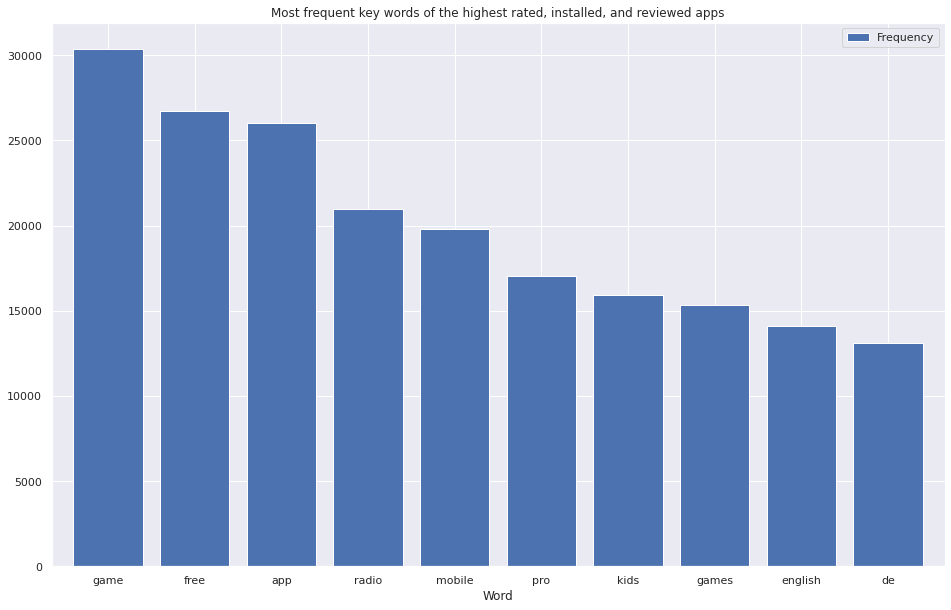

In [ ]:
def get_most_frequent_words(df_merged,title):
  top_N = 10
  stopwords = nltk.corpus.stopwords.words('english')
  RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

  words = (df_merged.app_name
            .str.lower()
            .str.cat(sep=' ')
            .split()
  )

  stopwords.extend(['&', '-', ':', '–', '2', '|'])

  real_words = [word for word in words if word not in stopwords]



  # generate DF out of Counter
  rslt = pd.DataFrame(Counter(real_words).most_common(top_N),
                      columns=['Word', 'Frequency']).set_index('Word')
  print(rslt)

  # plot
  rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
  plt.title(title)

title = "Most frequent key words of the highest rated, installed, and reviewed apps"
get_most_frequent_words(df_merged,title)

### Most frequent key words of the highest rated apps

The most frequent key words of apps with a rating in the 75th percentile (apps with a rating of at least 4.2) include **'free', 'game', and 'radio'**.

           Frequency
Word                
free            9072
game            8381
radio           7042
app             6508
theme           6322
live            5519
wallpaper       5499
english         5162
pro             5143
2020            4789


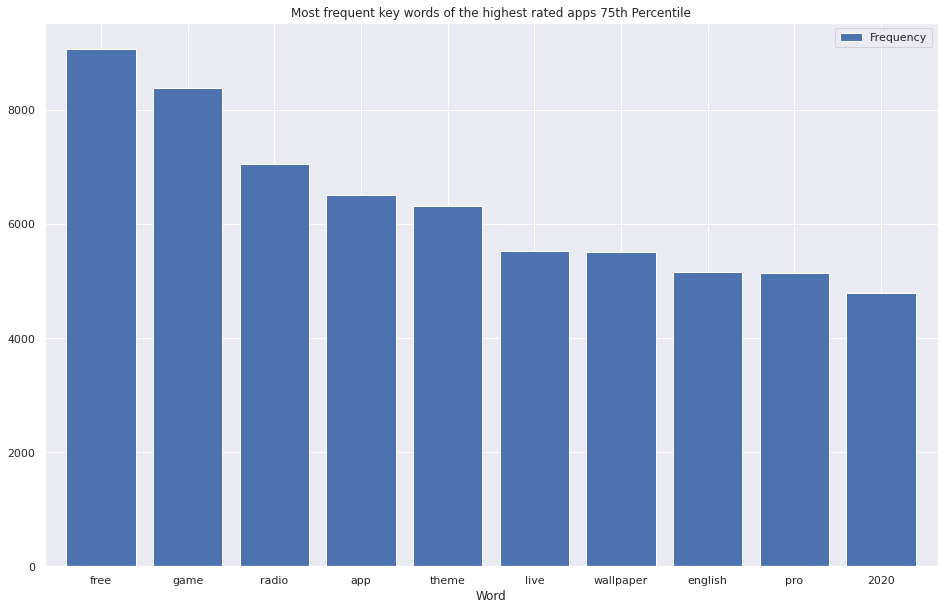

In [ ]:
highest_rated_75_df = df_merged[df_merged['avg_rating'] >= 4.2]
title = "Most frequent key words of the highest rated apps 75th Percentile"
get_most_frequent_words(highest_rated_75_df,title)

The most frequent key words of apps with a rating in the 90th percentile (apps with a rating of at least 4.6) include **'radio', 'theme', and 'free'**.

           Frequency
Word                
radio           4025
theme           3318
free            2886
app             2682
game            2454
mobile          2082
wallpaper       2074
keyboard        2058
offline         2026
pro             2003


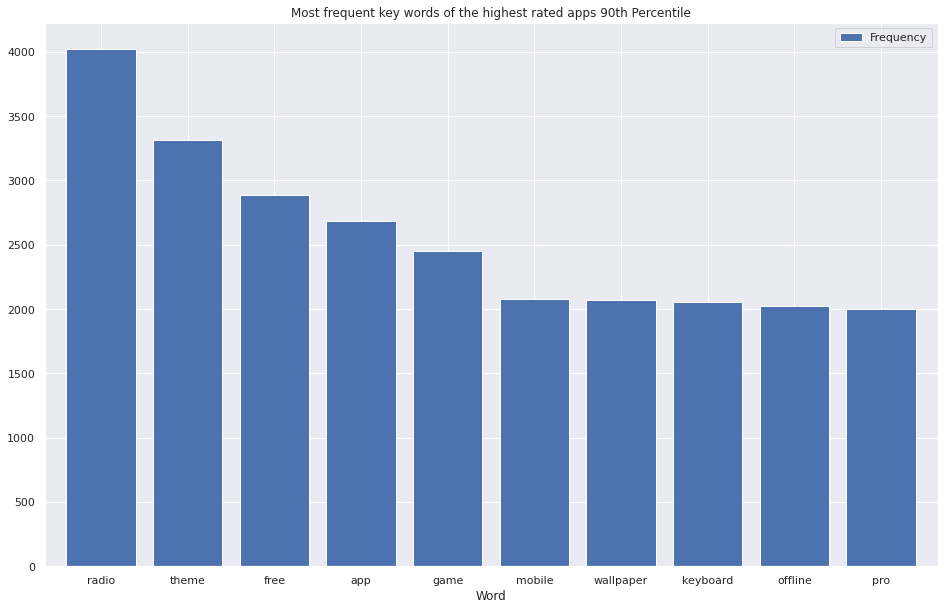

In [ ]:
highest_rated_90_df = df_merged[df_merged['avg_rating'] >= 4.6]
title = "Most frequent key words of the highest rated apps 90th Percentile"
get_most_frequent_words(highest_rated_90_df,title)

The most frequent key words of apps with a rating in the 99th percentile (apps with a rating of 5.0) include **'radio', 'mobile', and 'game'**.

        Frequency
Word             
radio        1296
mobile       1291
game         1186
bank          931
app           893
puzzle        564
free          535
church        488
games         458
fm            429


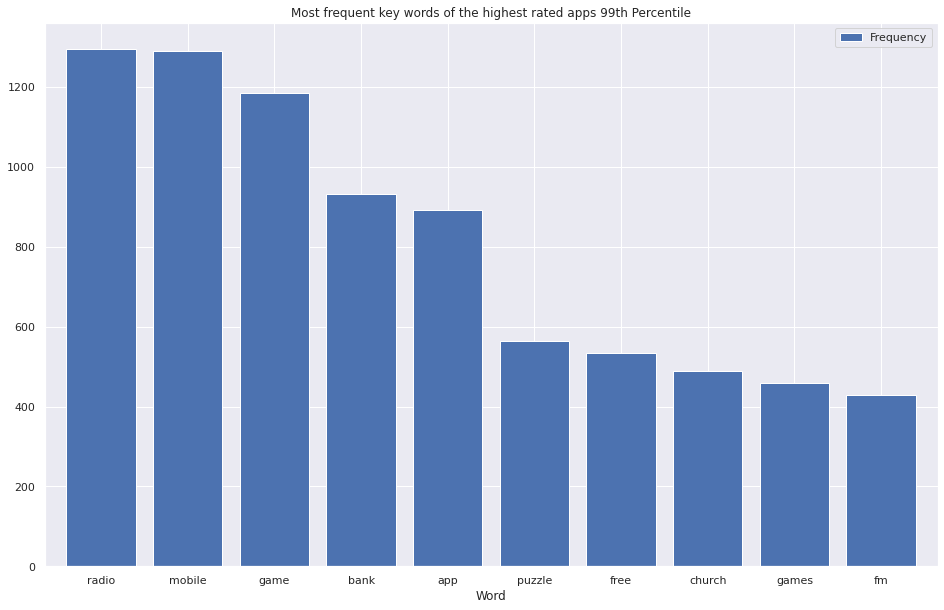

In [ ]:
highest_rated_99_df = df_merged[df_merged['avg_rating'] == 5.0]
title = "Most frequent key words of the highest rated apps 99th Percentile"
get_most_frequent_words(highest_rated_99_df,title)

### Most frequent key words of the most reviewed apps

The most frequent key words of apps with a rating in the 75th percentile (apps with at least 61 reviews) include **'free', 'game', and 'photo'.**

        Frequency
Word             
free        10801
game         8760
app          7012
games        6154
photo        5568
live         5425
mobile       5396
pro          5076
theme        4808
2020         4757


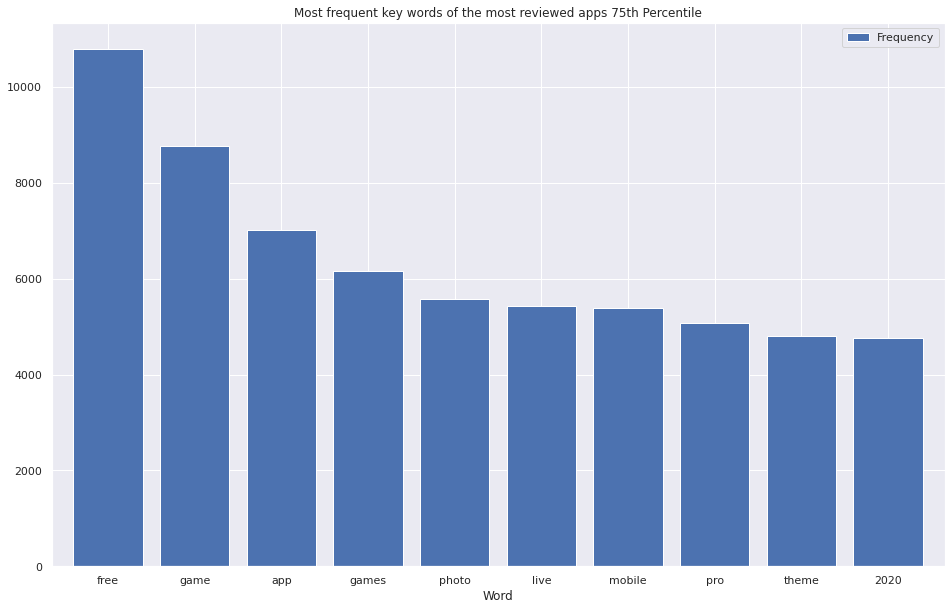

In [ ]:
highest_num_rated_75_df = df_merged[df_merged['num_ratings'] >= 6.100000e+01]
title = "Most frequent key words of the most reviewed apps 75th Percentile"
get_most_frequent_words(highest_num_rated_75_df,title)

The most frequent key words of apps with a rating in the 90th percentile (apps with at least 879 reviews) include **'free', 'game', and 'photo'.**

        Frequency
Word             
free         5846
game         4626
games        3371
app          3001
photo        2577
live         2512
video        2204
3d           2016
mobile       2010
2020         1943


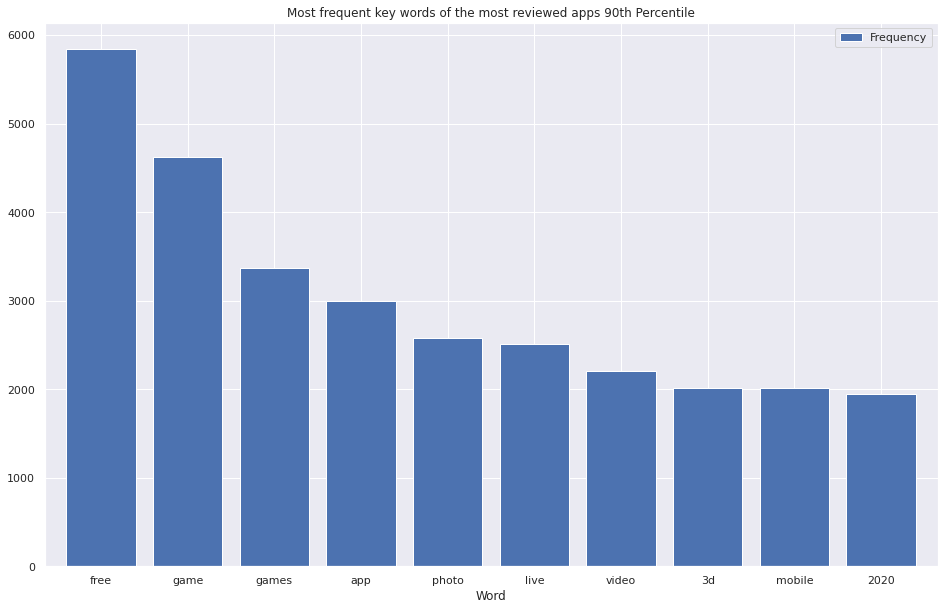

In [ ]:
highest_num_rated_90_df = df_merged[df_merged['num_ratings'] >= 8.790000e+02]
title = "Most frequent key words of the most reviewed apps 90th Percentile"
get_most_frequent_words(highest_num_rated_90_df,title)

The most frequent key words of apps with a rating in the 99th percentile (apps with at least 77,788 reviews) include **'free', 'game', and 'video'.**

        Frequency
Word             
free          799
game          663
games         409
video         400
app           343
photo         315
music         290
3d            288
live          278
editor        268


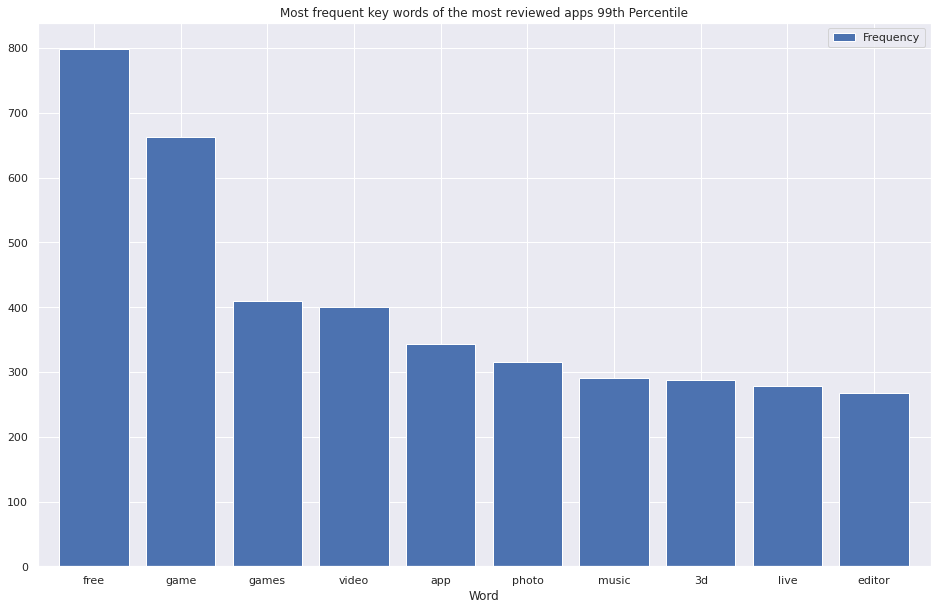

In [ ]:
highest_num_rated_99_df = df_merged[df_merged['num_ratings'] >= 7.778800e+04]
title = "Most frequent key words of the most reviewed apps 99th Percentile"
get_most_frequent_words(highest_num_rated_99_df,title)

### Most frequent key words of the most downloaded apps

The most frequent key words of apps with at least 1 million downloads include **'free', 'game', 'photo', and 'video.**

           Frequency
Word                
free            2445
game            1992
games           1670
photo           1417
video           1183
app             1089
3d              1069
live             969
car              879
simulator        805


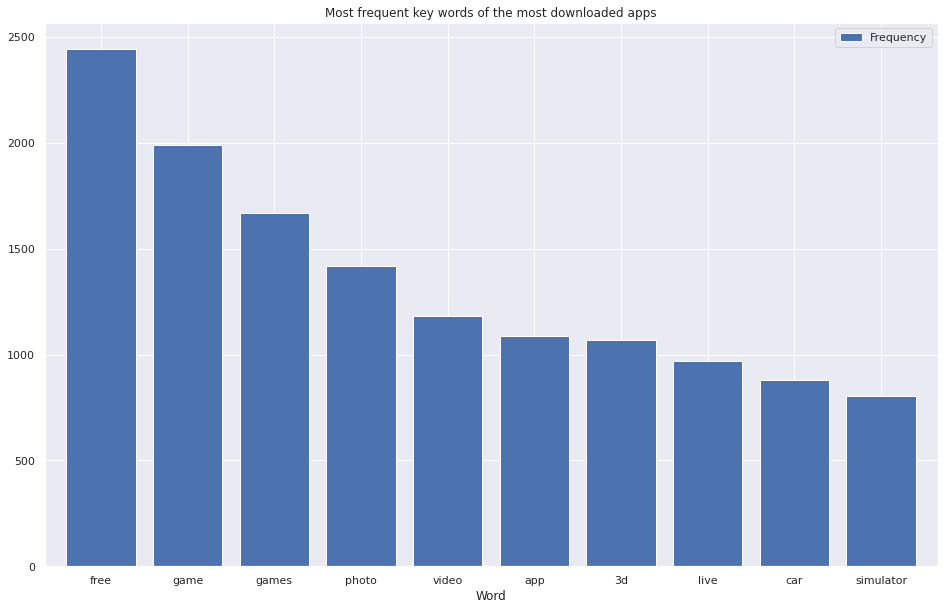

In [ ]:
top_installed_df = df_merged[(df_merged['num_installs'] == '1,000,000,000+') | (df_merged['num_installs'] == '100,000,000-999,999,999') | (df_merged['num_installs'] == '10,000,000-99,999,999') | (df_merged['num_installs'] == '1,000,000-9,999,999')]
title = "Most frequent key words of the most downloaded apps"
get_most_frequent_words(top_installed_df,title)

## Percentages of free and paid apps

The vast majority of apps from both the apple app store and the google play store are free. Out of the apps available, about 93 percent of all apps are free. 89% of apps on the apple store are free, while 94 percent of google play store apps are free. 

This may suggest that people are more willing to use free apps as opposed to paid apps. While there exists a theory that people are more willing to invest and use in things that they pay money for, this does not seem to be the case when it comes to choosing apps to download. 

In other words, if there is a price, the majority of people will not choose to use it to begin with, let alone invest time or energy in those apps.

In [ ]:
cost_type_percentage_df = df_merged.groupby(['store', 'cost_type']).size().reset_index().rename(columns={0:'app_count'})
cost_type_percentage_df['percent'] = cost_type_percentage_df['app_count'] / cost_type_percentage_df.app_count.sum() * 100

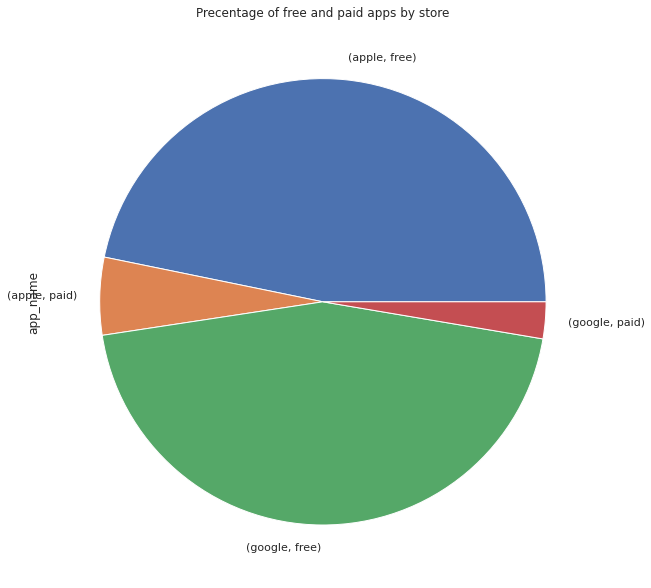

In [ ]:
df_merged.groupby(['store', 'cost_type'])['app_name'].count().plot.pie(figsize=(10, 15))
_ = plt.title("Precentage of free and paid apps by store")

In [ ]:
# Filter Free and Paid apps
Free = df_merged[df_merged['cost_type'] == 'free']['category'].value_counts().to_frame()
Paid = df_merged[df_merged['cost_type'] == 'paid']['category'].value_counts().to_frame()

Total = Free.join(Paid, lsuffix ='_Free', rsuffix='_Paid')
Total = Total.head(5)

Total #.reset_index(level=0)

categories = Total.index.tolist()

In [ ]:
Total.reset_index()

,index,category_Free,category_Paid
0,education,180539,27450
1,game,168053,19866
2,business,160120,3724
3,entertainment,91353,6938
4,food & drink,63385,1411


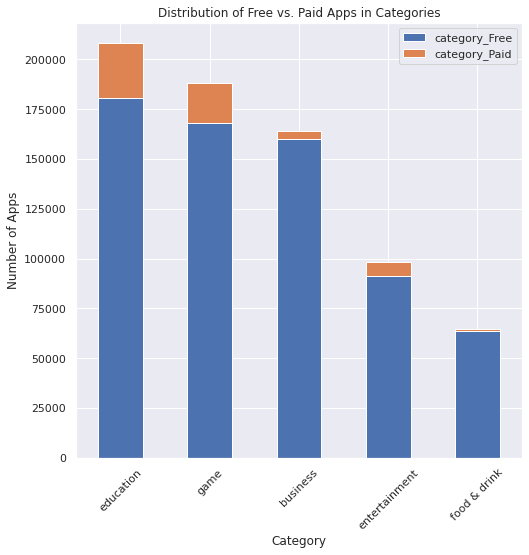

In [ ]:
Total.plot(kind='bar', use_index=True, stacked=True, figsize=(8,8))
# Labels
plt.title("Distribution of Free vs. Paid Apps in Categories")
plt.xticks(rotation=45)
plt.xlabel("Category")
_ = plt.ylabel("Number of Apps")

## Correlations


**Is there a correlation between number of app installs, number of app reviews, and the average rating of apps?**

We notice that, when grouped by the number of installations, the median rating of all apps on the apple app store is generally constant between 4.2 and 4.4. However, the variance in the ratings decrease as the number of app installations increase.

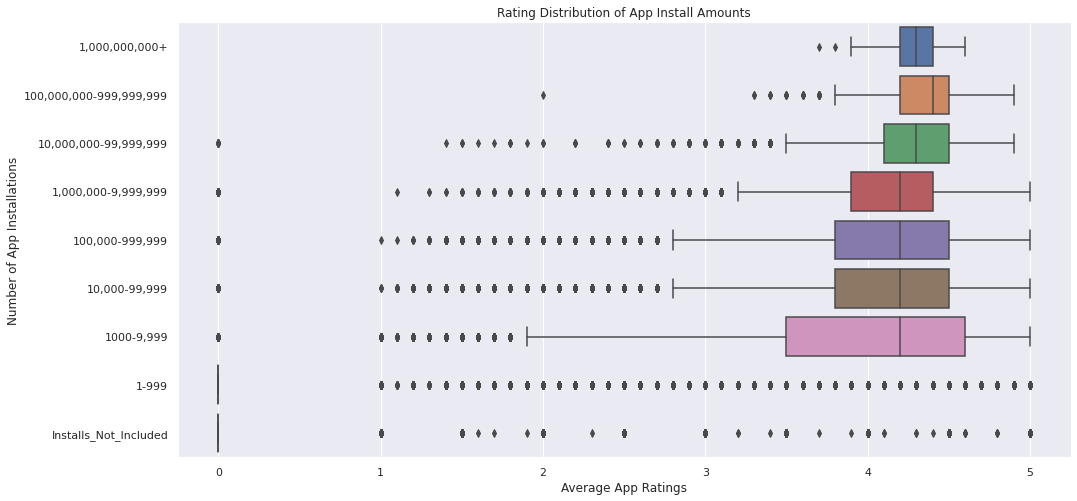

In [ ]:
plt.figure(figsize=(16,8))
plot_order = reversed(['Installs_Not_Included', '1-999', '1000-9,999', '10,000-99,999', '100,000-999,999', '1,000,000-9,999,999', '10,000,000-99,999,999', '100,000,000-999,999,999', '1,000,000,000+'])
ax = sns.boxplot(x="avg_rating", y="num_installs", orient='h', data=df_merged, order=plot_order)
_ = ax.set(title='Rating Distribution of App Install Amounts', ylabel='Number of App Installations', xlabel="Average App Ratings")

**Do apps that support more than 1 language correlate with more ratings, reviews, or installs?**


The apps below pertain only to stores available in the apple app store. As observed in the plot below, the number of languages available on an app does not necessarily correlate with the average rating of the app. However, it is noticable that the only apps with an average rating of at least 4.0 on the apple app store supports at least 46 different languages.

Text(0.5, 1.0, '')

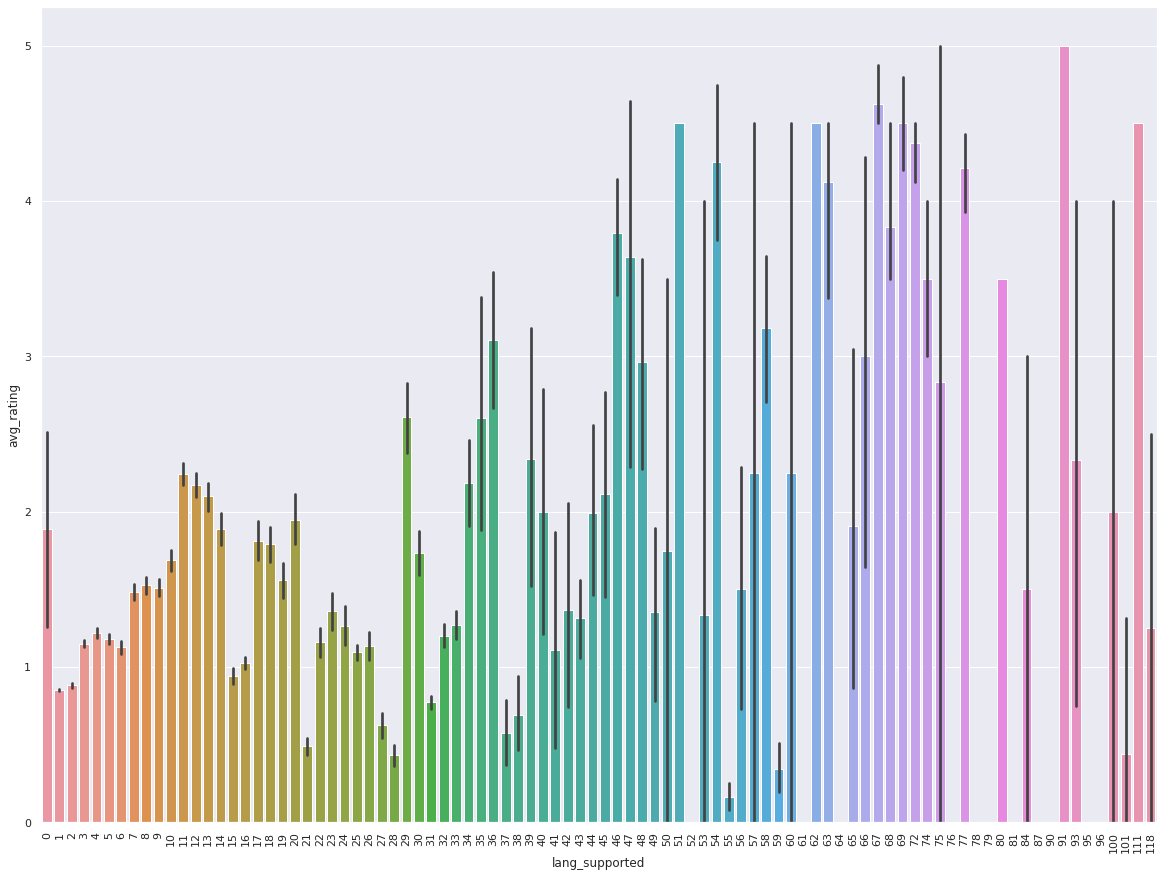

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
g = sns.barplot(data=df_merged[df_merged['store'] == 'apple'], x='lang_supported', y='avg_rating')
plt.title("")
# g.set_xticklabels(rotation=30)

## App usage at different points of 2020 and the pandemic

**Which store was utilized more during the pandemic?**

In trying to see how our different dataframes differed over time we found we were not able to properly compare due to the different sizes of the files. When looking solely at Apple however we can see that there is an increase in the number of ratings between the march and june files, which is expected.

In [ ]:
store_use_df = df_merged[~(df_merged.num_ratings == 'Installs_Not_Included')	]
store_use_grouped_df = store_use_df.groupby(["scrape_date","store"]).mean().sort_values(by="scrape_date")
store_use_grouped_df = store_use_grouped_df.reset_index()
store_use_grouped_df

,scrape_date,store,avg_rating,num_ratings,lang_supported
0,2020-03-01,apple,0.901776,636.342120,3.047492
1,2020-04-01,google,3.751774,64391.356504,1.000000
2,2020-06-01,apple,3.526894,12896.467130,5.436136
3,2020-06-01,google,4.173093,255279.351312,1.000000
4,2020-07-01,google,2.976808,8627.286800,1.000000


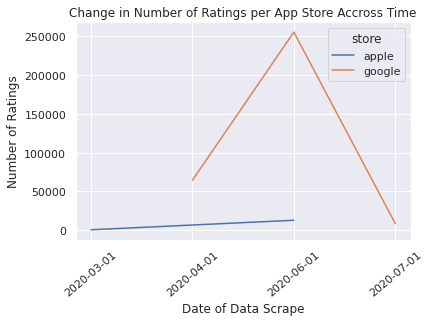

In [ ]:
plt.xticks(rotation=40)
sns.lineplot(data = store_use_grouped_df, x = 'scrape_date', y = 'num_ratings', hue = 'store')
#format plot
plt.title('Change in Number of Ratings per App Store Accross Time')
plt.ylabel("Number of Ratings")
_ = plt.xlabel("Date of Data Scrape")

**At the start of the pandemic, which apps were utalized more in the Play Store.**

The top Play Store apps at the start of the pandemic are: ['WhatsApp Messenger', 'Facebook', 'Instagram', 'Messenger – Text and Video Chat for Free', 'YouTube']

In [ ]:
top_playstore = df_merged.sort_values('num_ratings', ascending=False)
top_playstore = list(top_playstore[(top_playstore.store == 'google') & (top_playstore.scrape_date == '2020-04-01')].app_name.head(5))
print('The top Play Store apps at the start of the pandemic are:',top_playstore)

The top Play Store apps at the start of the pandemic are: ['WhatsApp Messenger', 'Facebook', 'Instagram', 'Messenger – Text and Video Chat for Free', 'YouTube']


**Two months into the pandemic, which apps were used most in the apple app store?**

The top Apple Store apps two months into the pandemic are: ['YouTube: Watch, Listen, Stream', 'Spotify: Music and Podcasts', 'Venmo', 'DoorDash - Food Delivery', 'Fortnite'].

In [ ]:
top_applestore = df_merged.sort_values('num_ratings', ascending=False)
top_apple = list(top_applestore[(top_applestore.store == 'apple') & (top_applestore.scrape_date == '2020-03-01')].app_name.head(5))
print('The top Apple Store apps two months into the pandemic are:',top_apple)

The top Apple Store apps two months into the pandemic are: ['YouTube: Watch, Listen, Stream', 'Spotify: Music and Podcasts', 'Venmo', 'DoorDash - Food Delivery', 'Fortnite']


**At the end of the academic school year, which apps were most used in the apple app store?**

The top Apple Store apps at the end of the 2020 academic year are: ['Facebook', 'Instagram', 'Clash of Clans', 'Temple Run', 'Pandora - Music & Radio']

In [ ]:
top_applestore_june = df_merged.sort_values('num_ratings', ascending=False)
top_apple_june = list(top_applestore_june[(top_applestore_june.store == 'apple') & (top_applestore_june.scrape_date == '2020-06-01')].app_name.head(5))


# Conclusion

**Age rating**

> It is very popular to have apps that are rated for everyone (4+). Age restrictions have a limit on how many people have access to the information, and may limit the amount of people who can use the app, particularly young people who would be learning.


**Price**

> The vast majority of apps downoaded on both the Google Play Store and the Apple App store are free. This, in conjunction with the observation that one of the most common keywords with highly rated, mass-reviewed, and mass-downloaded apps is 'free', suggests that most users are seeking apps that are available to be downloaded for free. Developers should note that having a price barrier limits the mass-appeal of of an app, as users are explicitly seeking those which come at no financial cost.


**Language Availability**

> We also observed that apps on the Apple App store that were offered in a variety of languages received higher ratings than apps that offered a small amount of languages. The only apps with a rating above 4.0 were ones avalable in over 45 languages. This suggests that developers should develop applications with an interface easily understandable to speakers of a wide variety of languages.


**Greatest and Least Downloaded and Rated Categories**

> We had initally assumed that the most popular apps would be communication, education and business apps. However, when we combined all of the data together, we realized that less than 25 thousand were categorized as communication apps. The most used categores within the scope of the shutdoen have been educational (ver 200,000 apps), games, and business. These would be the categories that we recommend developers to develop apps around. 


> A further study in this area could be focused on determining which subsets of apps within these categories have the most user downloads. We were unable to find this information because only one dataset contained a numeric value to the number of downloads (as opposed to a range). 



> Just looking at the top ten apps in general, based off of the average rating and num ratings, 'Amazon Prime Video' came in first, with 'Indeed Job Search' coming in second, and 'Premier Leauge Official App For Sports', which we believe highlights a key finding that Americans are using Prime video as a form of entertainment and Indeed Job Search has the best ratings because more people are looking for jobs. Within the top ten categories, Google Classroom also exists. It is the only educational app that comes into the top ten when we compare all categories. This suggests that Google Classroom has significantly increased its market share in the educational app landscape. 



> When we take a more granular approach to educational apps, we discovered that language learning apps, such as Duolingo, Memrise, and HelloEnglish, were most utilized with Google Play Store apps. The only app out of the top ten Google Play apps that wasn't focused on language was PhotoMath. In comparison, has significantly fewer learning apps as the top 10 within the education category and instead more classroom management apps were were highly rated and reviewed. These apps includes ClassDojo, Canvas Student, Quizlet, and BlackBoard. One outlier was __PhotoMath__ as the only app within the Apple App Store top ten and also in the Google Play Store top ten for education apps. 



> Our thoughts on apps with the highest number of zero reviews is that the goal of many of these apps may be to accomplish tasks in fields such as finance and business, as opposed to having a good user experience. These categories are among the top used apps. Assuming many people do not post reviews on apps, it may be understandable why apps in these categories have the fewest number of ratings.



> We also observed that the number of downloads does not have a clear correlation with the median rating of the app. It is important to note, however, that apps with a large number of downloads have less of a variance in user rating than apps with fewer downloads. In other words, it is more likely for an app with a smaller number of downloads to have a small rating than it is for an app with a large number of downloads. Apps with a large number of downloads are generally rated by users to have at least 4 stars.


In [ ]:
# create sample of entire dateset for dashboard




# Future Explorations



Moving forward we would like to explore using unsurpervised machine learning with clustering algorithms, in particular we would like to explore using the k-means to group similar data points into clusters. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


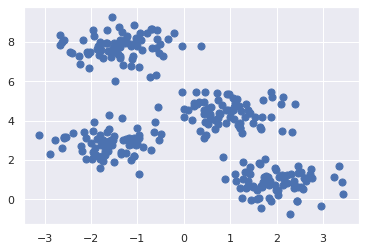

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50);

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:

algorithmTesting = df_merged[['avg_rating', 'num_ratings']]
algorithmTesting = algorithmTesting.dropna()
algorithmTesting.head()

,avg_rating,num_ratings
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
X = algorithmTesting.values
X

array([[   0. ,    0. ],
       [   0. ,    0. ],
       [   0. ,    0. ],
       ...,
       [   3.8, 1170. ],
       [   4.6,  671. ],
       [   3.6,  476. ]])

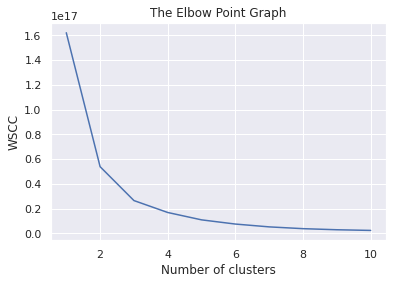

In [ ]:
# use the elbow method to find the optimal number of clusters
wscc = [] # look up how to calculate wscc
for i in range(1,11): 
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=42)
  kmeans.fit(X)
  # append the WCSS to the list 
  # kmeans.inertia_ returns the WCSS value for the initialized clusters
  wscc.append(kmeans.inertia_)

  # plot the elbow graph
plt.plot(range(1,11), wscc)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()

Looking at the elbow plot we see that after 3 the drop in WCSS is minimal. Therefore we will choose 3 as the optimal number of clusters 

Next we'll initialize K-Means with the optimum number of clusters from our elbow graph

In [ ]:
# fitting K_means to the dataset
kmeans = KMeans(n_clusters = 3, init= 'k-means++', random_state=0)

# return a label for each data point based on number of clusters
y = kmeans.fit_predict(X)
print(y)

[0 0 0 ... 0 0 0]


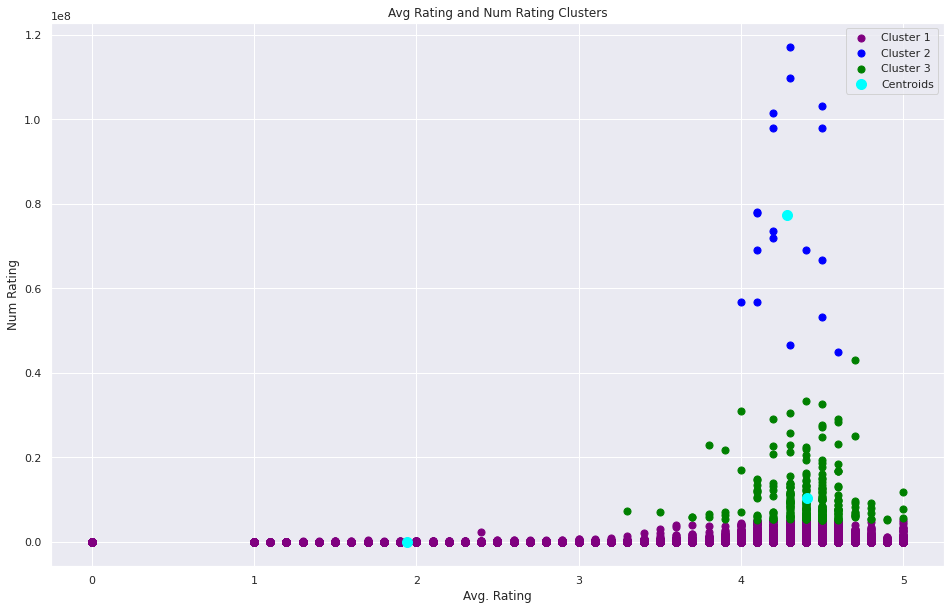

In [ ]:
# visualising the clusters
plt.figure( figsize=(16,10) )
# user scatter plotting for (x,y) with label 1 as cluster 1 with a color of red and points the size s =50
plt.scatter(X[y ==0, 0], X[y == 0, 1], s = 50, c = 'purple', label='Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label='Cluster 2' ) 
plt.scatter(X[y ==2,0], X[y == 2, 1], s = 50, c = 'green', label='Cluster 3')

# scatter plotting the centroiods with label 'centroiod'

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='cyan', label='Centroids')
plt.title('Avg Rating and Num Rating Clusters')
plt.xlabel('Avg. Rating')
plt.ylabel('Num Rating')
plt.legend()
plt.show()

Text(0, 0.5, 'Num Raings')

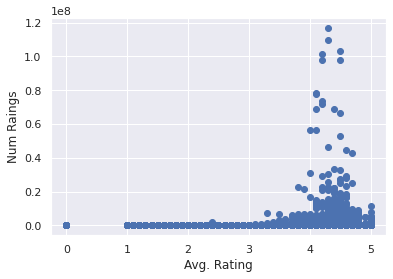

In [ ]:
plt.scatter(algorithmTesting.avg_rating, algorithmTesting['num_ratings'])  #color='#76c2b4'
plt.xlabel('Avg. Rating')
plt.ylabel('Num Raings')

# Subset of Merged dataframe

In [ ]:
df_merged_sample = df_merged.sample(n=50000,random_state=1)
df_merged_sample.head()

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
718373,26ο Πανελλήνιο Συνέδριο ΕΨΕ,12+,0.0,0.0,free,medical,1,apple,2020-03-01,Installs_Not_Included,NaN
671752,Astra Motor Catalogue,4+,0.0,0.0,free,business,1,apple,2020-03-01,Installs_Not_Included,NaN
1392227,15 August wishes,4+,0.0,0.0,free,lifestyle,1,google,2020-07-01,1-999,2019-08-10
545048,Den Blå Planet,4+,0.0,0.0,free,education,3,apple,2020-03-01,Installs_Not_Included,NaN
909027,VAT Smart,4+,0.0,NaN,free,finance,1,google,2020-07-01,1-999,2019-12-25


In [ ]:
df_merged_sample.shape

(50000, 11)

# Duplication

In [ ]:
duplicate_subset_df = df_merged[~(df_merged.num_ratings == 0)]

In [ ]:
duplicates = duplicate_subset_df.app_name
duplicate_clean_df = duplicate_subset_df[duplicates.isin(duplicates[duplicates.duplicated()])].sort_values(by="app_name")

In [ ]:
duplicate_clean_df.head()

,app_name,age_rating,avg_rating,num_ratings,cost_type,category,lang_supported,store,scrape_date,num_installs,last_updated
1394861,"""Hack Não"" 4000 Từ Vựng Tiếng Anh | EngHacking",4+,4.4,747.0,free,education,1,google,2020-07-01,"10,000-99,999",2020-05-01
776436,"""Hack Não"" 4000 Từ Vựng Tiếng Anh | EngHacking",4+,4.7,415.0,free,education,1,google,2020-04-01,"10,000-99,999",NaN
776435,"""Hack Não"" 4000 Từ Vựng Tiếng Anh | EngHacking...",4+,5.0,15.0,paid,education,1,google,2020-04-01,1-999,NaN
1394860,"""Hack Não"" 4000 Từ Vựng Tiếng Anh | EngHacking...",4+,4.8,36.0,paid,education,1,google,2020-07-01,1-999,2020-03-17
776434,"""I AM"" Love Manifesting Affirmations",4+,4.7,31.0,free,health & fitness,1,google,2020-04-01,"1000-9,999",NaN


In [ ]:
duplicate_clean_df.shape #132344,11

(132344, 11)

In [ ]:
duplicate_clean_df.scrape_date.unique()

array(['2020-07-01', '2020-04-01', '2020-03-01', '2020-06-01'],
      dtype=object)

In [ ]:
store_use_df = duplicate_clean_df[~(duplicate_clean_df.num_ratings == 'Installs_Not_Included')	]
store_use_grouped_df = store_use_df.groupby(["scrape_date","store"]).mean().sort_values(by="scrape_date")
store_use_grouped_df = store_use_grouped_df.reset_index()
store_use_grouped_df

,scrape_date,store,avg_rating,num_ratings,lang_supported
0,2020-03-01,apple,3.979644,9485.006937,4.136764
1,2020-04-01,google,4.225357,75140.280260,1.000000
2,2020-06-01,apple,4.124737,19144.318947,5.776842
3,2020-06-01,google,4.203250,388126.975360,1.000000
4,2020-07-01,google,4.126144,62407.585688,1.000000


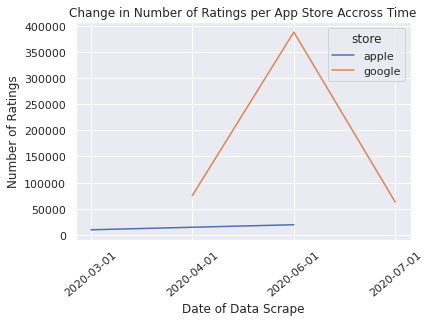

In [ ]:
plt.xticks(rotation=40)
sns.lineplot(data = store_use_grouped_df, x = 'scrape_date', y = 'num_ratings', hue = 'store')
#format plot
plt.title('Change in Number of Ratings per App Store Accross Time')
plt.ylabel("Number of Ratings")
_ = plt.xlabel("Date of Data Scrape")